# Scott's Bike Analyst Project

## Introduction

As a junior data analyst in the marketing analytics team at Cyclistic, your task is to collect, analyze, and report data that helps guide the company's marketing strategy. The director of marketing has set a clear goal of designing marketing strategies aimed at converting casual riders into annual members, and this case study aims to answer key business questions by analyzing Cyclistic's historical trip data. Specifically, the focus is on understanding how annual members and casual riders use Cyclistic bikes differently in order to maximize annual memberships.

## Data

The data used in this case study are the historical trip data from Cyclistic, a fictional bike-share company in Chicago, for the previous 12 months (April 2020 to March 2021). This data is publicly available and has been provided by Motivate International Inc. under a license. The data has been used to explore how different types of customers are using Cyclistic bikes, with a focus on how annual members and casual riders use the bikes differently. It is important to note that due to data-privacy issues, personally identifiable information about the riders cannot be used. The data sources used in this case study are not specified beyond the historical trip data. The analysis produced in this case study includes a summary of key findings and supporting visualizations, as well as recommendations for Cyclistic based on the analysis.

Data cleaning and manipulation steps processed the data by replacing missing and blank values, removing duplicates, and renaming columns. It also converted columns to their appropriate data types, calculated ride length, filtered out rides over 4 hours, and added new variables such as ride length in seconds and minutes, hour of day, day of week, and year. Additionally, dictionaries were created to map day of week and hour of day numbers to their respective names and labels. Finally, a dictionary of colors for each user type was defined.

Link: https://divvy-tripdata.s3.amazonaws.com/index.html

## Background

The Cyclistic bike-share analysis project aims to understand how casual riders and annual members use Cyclistic bikes differently in order to help design a new marketing strategy to convert casual riders into annual members. The project is important for the future success of Cyclistic, as the company's marketing strategy currently relies on building general awareness and appealing to broad consumer segments, and annual members have been identified as much more profitable than casual riders. By understanding the differences between these two groups, the marketing team can design more targeted campaigns aimed at converting casual riders to annual members.

The project involves analyzing Cyclistic's historical bike trip data to identify trends and producing a report with clear business goals, data sources, analysis, visualizations, key findings, and recommendations. The project is led by the director of marketing at Cyclistic and supported by the Cyclistic marketing analytics team, which includes the junior data analyst working on this project. The executive team at Cyclistic will ultimately decide whether to approve the recommended marketing program.

## Business Problem

Cyclistic is a bike-share company in Chicago that wants to increase its annual membership numbers as they are more profitable than casual riders. As a junior data analyst on the marketing analytics team, your manager, wants you to analyze Cyclistic’s historical bike trip data to identify how annual members and casual riders use Cyclistic bikes differently. The goal is to identify key differences between the two groups to inform a new marketing campaign aimed at converting casual riders into annual members. The results of the analysis should be backed up with compelling data insights and professional data visualizations to gain approval from the Cyclistic executives for the recommended marketing program.

## Analysts Performed in Python

Data cleaning and manipulation: The historical trip data needs to be cleaned and manipulated to prepare it for analysis. This may involve removing duplicates, handling missing values, and aggregating data at different levels of granularity.

Data analysis: Analyzing the historical trip data to identify trends and differences between how annual members and casual riders use Cyclistic bikes.

Data visualization: Creating professional data visualizations to communicate the analysis results to a non-technical audience.

Business acumen: Understanding Cyclistic's business goals and how the analysis results will inform a new marketing campaign aimed at converting casual riders into annual members.

# Code

## Setting up the workspace and files

In [843]:
pip install geopy

In [844]:
import calendar
import plotly.express as px
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from geopy.distance import geodesic

In [845]:
# concat
# Define a list of file names
files = ["Portfolio Projects/202004-divvy-tripdata.csv",
         "Portfolio Projects/202005-divvy-tripdata.csv",
         "Portfolio Projects/202006-divvy-tripdata.csv",
         "Portfolio Projects/202007-divvy-tripdata.csv",
         "Portfolio Projects/202008-divvy-tripdata.csv",
         "Portfolio Projects/202009-divvy-tripdata.csv",
         "Portfolio Projects/202010-divvy-tripdata.csv",
         "Portfolio Projects/202011-divvy-tripdata.csv",
         "Portfolio Projects/202012-divvy-tripdata.csv",
         "Portfolio Projects/202101-divvy-tripdata.csv",
         "Portfolio Projects/202102-divvy-tripdata.csv",
         "Portfolio Projects/202103-divvy-tripdata.csv"]

# Load the first file into a DataFrame
df_concat = pd.read_csv(files[0])

# Loop through the rest of the files and concatenate them to the first DataFrame
for i in range(1, len(files)):
    df = pd.read_csv(files[i])
    df_concat = pd.concat([df_concat, df], axis=0)

# Save the concatenated DataFrame to a new CSV file
df_concat.to_csv("Portfolio Projects/concatenated_file.csv", index=False)


In [846]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("Portfolio Projects/concatenated_file.csv", low_memory=False)

## Data Cleaning Process

In [847]:
print(df.head())  # to check the first few rows of the dataset
print(df.describe())  # to get some statistics about the data
print(df.info())  # to get information about the data types and missing values

            ride_id rideable_type           started_at             ended_at  \
0  A847FADBBC638E45   docked_bike  2020-04-26 17:45:14  2020-04-26 18:12:03   
1  5405B80E996FF60D   docked_bike  2020-04-17 17:08:54  2020-04-17 17:17:03   
2  5DD24A79A4E006F4   docked_bike  2020-04-01 17:54:13  2020-04-01 18:08:36   
3  2A59BBDF5CDBA725   docked_bike  2020-04-07 12:50:19  2020-04-07 13:02:31   
4  27AD306C119C6158   docked_bike  2020-04-18 10:22:59  2020-04-18 11:15:54   

             start_station_name start_station_id             end_station_name  \
0                  Eckhart Park             86.0  Lincoln Ave & Diversey Pkwy   
1     Drake Ave & Fullerton Ave            503.0              Kosciuszko Park   
2          McClurg Ct & Erie St            142.0   Indiana Ave & Roosevelt Rd   
3  California Ave & Division St            216.0       Wood St & Augusta Blvd   
4          Rush St & Hubbard St            125.0   Sheridan Rd & Lawrence Ave   

  end_station_id  start_lat  start_lng

In [848]:
# replace missing values with "N/A"
df.fillna("N/A", inplace=True)

# replace blank entries with NaN values
df = df.replace('', pd.NA)

# check for duplicates and remove them
df.drop_duplicates(inplace=True)

# rename columns
df.rename(columns={'rideable_type': 'vehicle_type', 'member_casual': 'user_type'}, inplace=True)


##type
#turning columns into correct type
# convert the "started_at" and "ended_at" columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['start_lat'] = df['start_lat'].astype(float)
df['start_lng'] = df['start_lng'].astype(float)
df['end_lat'] = df['end_lat'].replace('N/A', np.nan).astype(float)
df['end_lng'] = df['end_lng'].replace('N/A', np.nan).astype(float)

## Data Validation Checks and removing outliers

In [849]:
# calculate the ride length as the difference between "ended_at" and "started_at" columns
df['ride_length'] = df['ended_at'] - df['started_at']

In [850]:
# calculate the mean of ride_length
mean_ride_length = df['ride_length'].mean()

print(f"Mean ride length time: {mean_ride_length}")

# calculate the max of ride_length
max_ride_length = df['ride_length'].max()
print(f"Max ride length: {max_ride_length}")

Mean ride length time: 0 days 00:24:45.998430259
Max ride length: 40 days 18:40:02


In [851]:
# count the number of rides with a ride length over 4 hour
num_rides_over_4h = (df['ride_length'] > pd.Timedelta(hours=4)).sum()
# Count the number of rides with a ride length over 500 hours
num_rides_over_500h = (df['ride_length'] > pd.Timedelta(hours=500)).sum()
# Count the number of rides with a ride length under 4 hours
num_rides_under_4h = (df['ride_length'] < pd.Timedelta(hours=4)).sum()
print(f"Number of rides with a ride length over 500 hours: {num_rides_over_500h}")
print(f"Number of rides with a ride length over 4 hours: {num_rides_over_4h}")
print(f"Number of rides with a ride length under 4 hours: {num_rides_under_4h}")

Number of rides with a ride length over 500 hours: 73
Number of rides with a ride length over 4 hours: 14805
Number of rides with a ride length under 4 hours: 3474941


In [852]:
# filter out rides with length greater than 12 hour
df = df[(pd.Timedelta(hours=4) >= df['ride_length']) & (df['ride_length'] >= pd.Timedelta(seconds=0))]

## Variable Calculations and Dictionaries

In [853]:
##Variables
# Convert ride length to seconds
df['ride_length_seconds'] = df['ride_length'].dt.total_seconds()
# Convert ride_length to minutes
df['ride_length_minutes'] = df['ride_length'].dt.total_seconds() / 60
# extract hour of day from started_at column
df['hour_of_day'] = pd.to_datetime(df['started_at']).dt.hour
# Extract the month from a date column
df['month'] = pd.to_datetime(df['started_at']).dt.month
# calculate the day of the week that each ride started using the "weekday" command
df['day_of_week'] = df['started_at'].dt.weekday
# format the "day_of_week" column as a number with no decimals
df['day_of_week'] = df['day_of_week'].astype(int)
# Extract the year from the 'started_at' column
df['year'] = pd.DatetimeIndex(df['started_at']).year


##Dictionaries
# create a dictionary to map day of week numbers to day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
# create a dictionary to map hour of day numbers to hour values
hour_values = {0: '12', 1: '1 a.m.', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '1 p.m.', 14: '2', 15: '3', 16: '4', 17: '5', 18: '6', 19: '7', 20: '8', 21: '9', 22: '10', 23: '11'}
# Define the labels for each hour of day
hour_labels = ['12 AM - 2 AM', '2 AM - 4 AM', '4 AM - 6 AM', '6 AM - 8 AM', '8 AM - 10 AM', '10 AM - 12 PM',
               '12 PM - 2 PM', '2 PM - 4 PM', '4 PM - 6 PM', '6 PM - 8 PM', '8 PM - 10 PM', '10 PM - 12 AM']
# Define a dictionary of colors for each user type
colors1 = ["green", "red"]

In [854]:
# checking if files all 12 months or if I will have to concat all files together
# Count the unique values in the month column
unique_months = df['month'].nunique()
print("Number of unique months:", unique_months)

Number of unique months: 12


## Statistical Variables for Data Exploration

In [855]:
# Unique values for categorical columns
print(df['vehicle_type'].unique())
print(df['user_type'].unique())

# Frequency counts for categorical columns
print(df['vehicle_type'].value_counts())
print(df['user_type'].value_counts())

# calculate the mean of ride_length
mean_ride_length = df['ride_length'].mean()

# Convert the mean ride length value to timedelta format and extract the total seconds
mean_ride_length_timedelta = pd.to_timedelta(mean_ride_length)
mean_ride_length_seconds = mean_ride_length_timedelta.total_seconds()

# Format the mean ride length value as HH:MM:SS
mean_ride_length_str = f"{int(mean_ride_length_seconds/3600):02d}:{int((mean_ride_length_seconds%3600)/60):02d}:{int(mean_ride_length_seconds%60):02d}"

# Print the result
print(f"Mean ride length time: {mean_ride_length_str}")


# calculate the max of ride_length
max_ride_length = df['ride_length'].max()
print(f"Max ride length: {max_ride_length}")

# calculate the mode of day_of_week
mode_day_of_week = df['day_of_week'].mode()[0]
print(f"Mode day of week: {mode_day_of_week}")



# Group the data by user_type and calculate the mean of ride_length for each group
ride_length_by_user_type = df.groupby('user_type')['ride_length'].mean()

# Convert the ride length values to timedelta format and extract the total seconds
ride_length_by_user_type = ride_length_by_user_type.apply(lambda x: pd.to_timedelta(x).total_seconds())

# Format the ride length values as HH:MM:SS
ride_length_by_user_type = ride_length_by_user_type.apply(lambda x: f"{int(x/3600):02d}:{int((x%3600)/60):02d}:{int(x%60):02d}")

# Print the results
print("Average ride length for members:", ride_length_by_user_type['member'])
print("Average ride length for casual riders:", ride_length_by_user_type['casual'])



# calculate the average ride length for users by day of week
avg_ride_length_by_day = df.groupby('day_of_week')['ride_length'].mean().dt.seconds


# format the timedelta values as MM:SS
avg_ride_length_by_day = avg_ride_length_by_day.apply(lambda x: time.strftime('%H:%M:%S', time.gmtime(x)))

# print the result
print("Average ride length by day of week:")
print(avg_ride_length_by_day)

['docked_bike' 'electric_bike' 'classic_bike']
['member' 'casual']
docked_bike      2534280
electric_bike     610995
classic_bike      319116
Name: vehicle_type, dtype: int64
member    2050197
casual    1414194
Name: user_type, dtype: int64
Mean ride length time: 00:22:15
Max ride length: 0 days 04:00:00
Mode day of week: 5
Average ride length for members: 00:15:10
Average ride length for casual riders: 00:32:31
Average ride length by day of week:
day_of_week
0    00:20:41
1    00:19:31
2    00:19:19
3    00:19:42
4    00:21:13
5    00:26:06
6    00:26:46
Name: ride_length, dtype: object


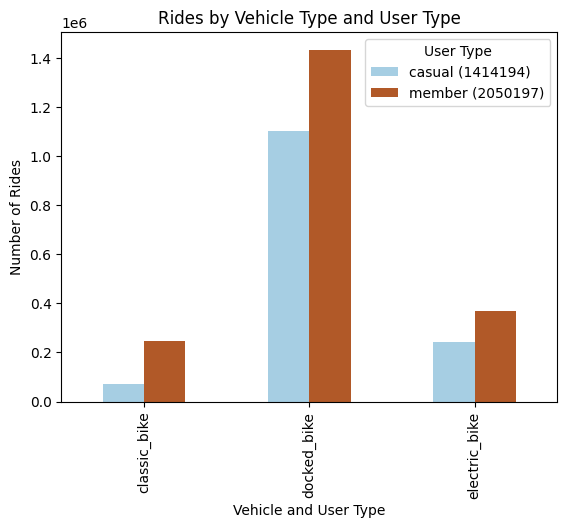

In [856]:
# Group the data by vehicle type and user type, and count the number of rides in each group
ride_counts1 = df.groupby(['vehicle_type', 'user_type'])['ride_id'].count()


# Create a bar chart and use the colormap to set the colors of the bars
ax = ride_counts1.unstack().plot(kind='bar', colormap='Paired')

# Set the title and labels
plt.title('Rides by Vehicle Type and User Type')
plt.xlabel('Vehicle and User Type')
plt.ylabel('Number of Rides')

# Set the legend
handles, labels = ax.get_legend_handles_labels()
labels = [f'{label} ({ride_counts1.loc[:, label].sum()})' for label in labels]
ax.legend(handles, labels, title='User Type')

# Show the plot
plt.show()

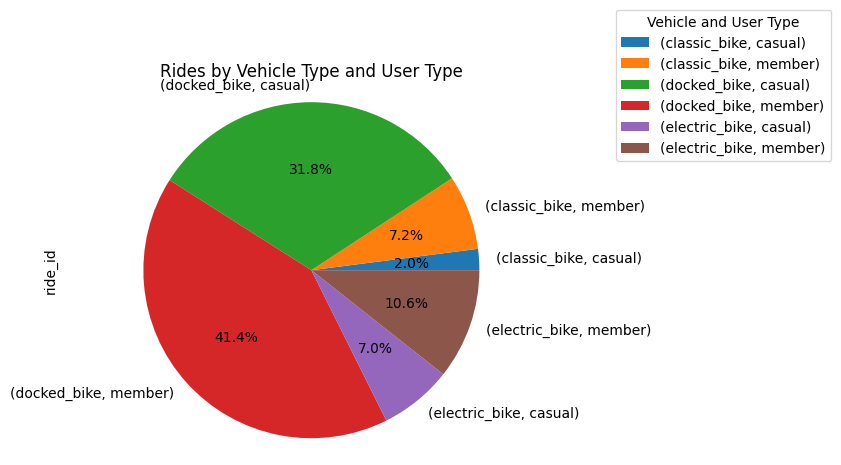

In [857]:
### Pie chart with distribution of vehicle and user types
#Create a pie chart
ride_counts1.plot(kind='pie', autopct='%1.1f%%')
plt.title('Rides by Vehicle Type and User Type')
plt.axis('equal')
plt.legend(title='Vehicle and User Type', loc='center left', bbox_to_anchor=(1.1, 1))
plt.show()

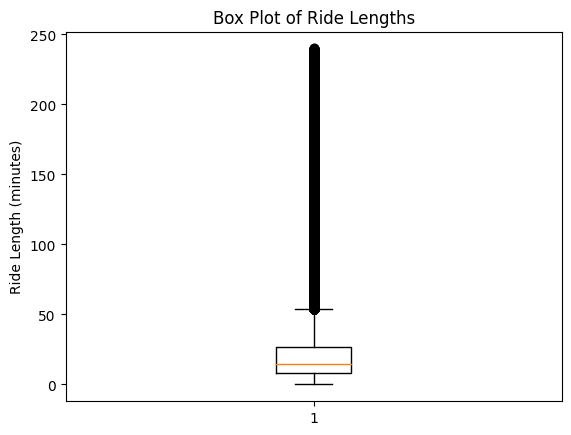

In [858]:
# Create a box plot of ride lengths
plt.boxplot(df['ride_length_minutes'])
plt.ylabel('Ride Length (minutes)')
plt.title('Box Plot of Ride Lengths')
plt.show()

### Creating variable ride distance1 from starting and ending latitude and longitude by using Geodesic library to further investigate trends between users

In [859]:
# drop rows where any of the start or end variables have NaN values
df = df.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])

# calculate ride distance and duration
df['ride_distance1'] = df.apply(lambda row: geodesic((row['start_lat'], row['start_lng']), (row['end_lat'], row['end_lng'])).miles, axis=1)
df['ride_duration_minutes'] = df['ride_length'] / pd.Timedelta(minutes=1)

# Select only the 'name' and 'occupation' columns
new_df = df[['ride_distance1', 'ride_duration_minutes']]
# print first 10 rows of the dataframe
print(new_df.head(10))

   ride_distance1  ride_duration_minutes
0        2.473894              26.816667
1        0.608713               8.150000
2        1.854582              14.383333
3        1.330589              12.200000
4        5.666709              52.916667
5        0.592436               5.400000
6        0.479089               5.216667
7        0.572687              75.816667
8        0.824540               5.733333
9        1.811902              17.316667


### Additional Variables after Geodesic

In [860]:
#Step 3: Creating Additional Variables after Geodesic
df['ride_length_minutes'] = df['ride_length_seconds'] / 60
df['ride_distance_km'] = df['ride_distance1'] / 1000
df['user_type_category'] = df['user_type'].apply(lambda x: 'Member' if x == 'member' else 'Casual')
df['hour_of_day_category'] = pd.cut(df['hour_of_day'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Segmentation

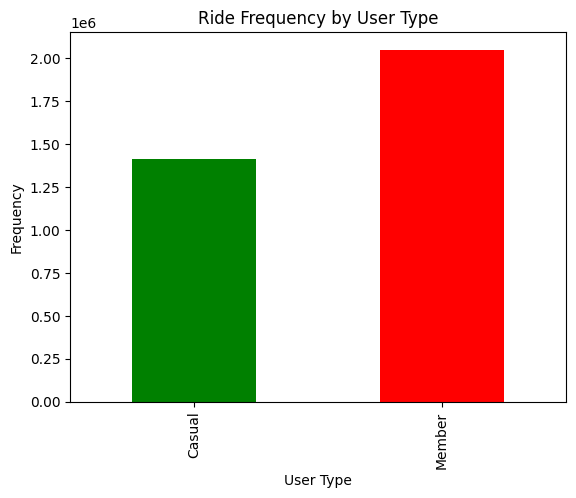

In [861]:
# Get the ride frequency for each user type and sort in ascending order Casual user type will always be on left and red
ride_frequency = df['user_type_category'].value_counts().sort_values(ascending=True)

# Create a bar chart and set the colors for each bar
ride_frequency.plot(kind='bar', color=colors1)

# Set the chart title and axis labels
plt.title('Ride Frequency by User Type')
plt.xlabel('User Type')
plt.ylabel('Frequency')

# Show the chart
plt.show()

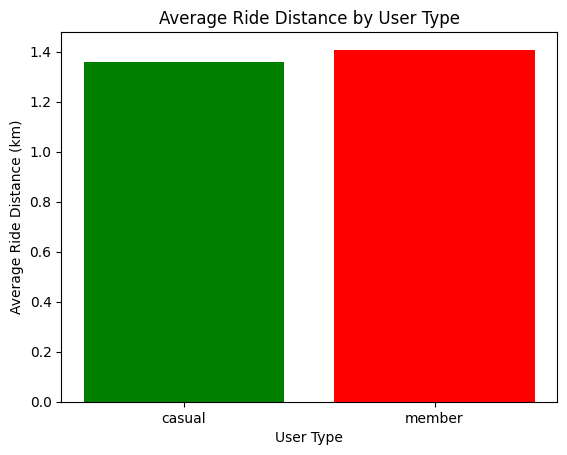

In [862]:
# Segment the data by user type
by_user = df.groupby("user_type")

#ride distance mean by user
result = by_user.agg({"ride_distance1": "mean"})

# Segment the data by user type
by_user = df.groupby("user_type")

# Calculate the mean ride distance by user type
ride_distance_means = by_user.agg({"ride_distance1": "mean"})

# Create a bar chart with custom colors
fig, ax = plt.subplots()
ax.bar(ride_distance_means.index, ride_distance_means["ride_distance1"], color=colors1)

# Set the chart title and axis labels
ax.set_title("Average Ride Distance by User Type")
ax.set_xlabel("User Type")
ax.set_ylabel("Average Ride Distance (km)")

# Show the results and chart
plt.show()

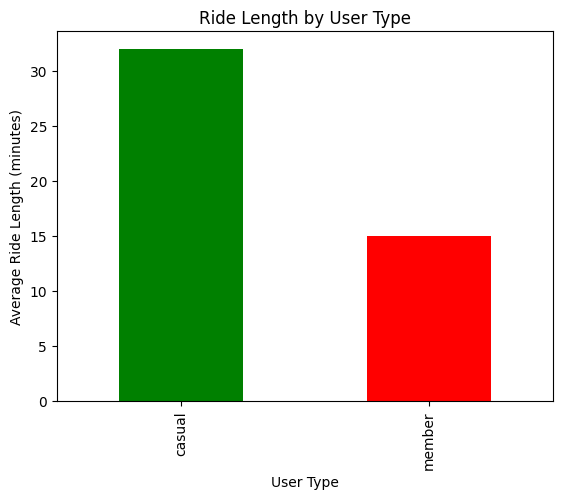

In [863]:
# convert ride_length column to timedelta dtype
df['ride_length'] = pd.to_timedelta(df['ride_length'])

# compute mean ride length by user type
ride_length = df.groupby('user_type')['ride_length'].mean()

# convert back to float for plotting
ride_length = ride_length.astype('timedelta64[m]').astype('float64')

# plot the bar chart
ride_length.plot(kind='bar', title='Ride Length by User Type', color=colors1)
plt.xlabel('User Type')
plt.ylabel('Average Ride Length (minutes)')
plt.show()

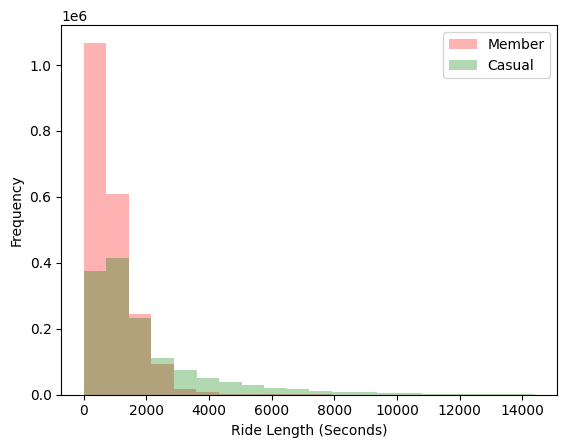

In [864]:
##Histogram: To show the distribution of ride lengths for members and casual riders and overlaying
# Filter the data by user type
members_data = df[df['user_type'] == 'member']
casual_data = df[df['user_type'] == 'casual']


# Create separate histograms for members and casual riders
plt.hist(df.loc[df['user_type'] == 'member', 'ride_length_seconds'], bins=20, alpha=0.3, color='red', label='Member')
plt.hist(df.loc[df['user_type'] == 'casual', 'ride_length_seconds'], bins=20, alpha=0.3, color='green', label='Casual')

# Add labels and legend
plt.xlabel('Ride Length (Seconds)')
plt.ylabel('Frequency')
plt.legend()

# Display the histogram
plt.show()

# Bike Availability Hourly Trends

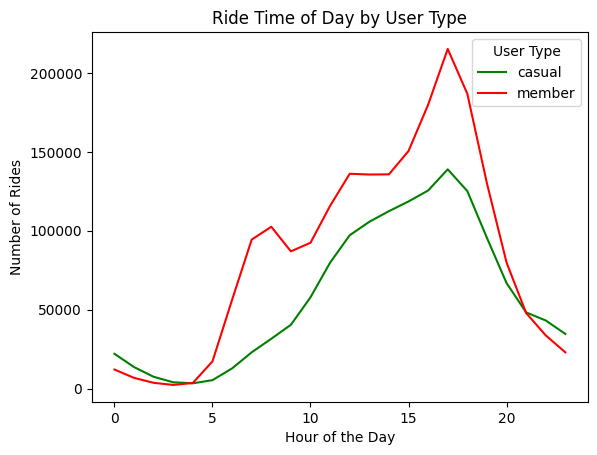

Ride Time of Day by User Type:


In [865]:
df['start_hour'] = pd.to_datetime(df['started_at']).dt.hour
ride_time = df.groupby(['user_type', 'start_hour'])['ride_id'].count()

ax = ride_time.unstack('user_type').plot(title='Ride Time of Day by User Type', color = colors1)
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Rides')
ax.legend(title='User Type')
plt.show()
print('Ride Time of Day by User Type:')

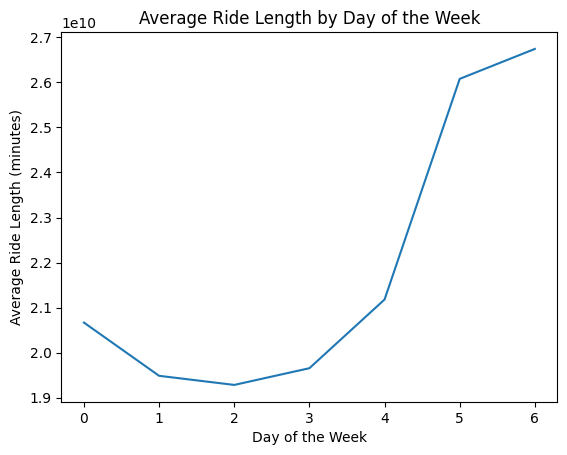

In [866]:
# Group the data by weekday and calculate the mean ride length for each weekday
rides_by_weekday = df.groupby('day_of_week')['ride_length'].mean() / 60  # Convert to minutes

# Create a line plot
rides_by_weekday.plot(kind='line')

# Set the x-axis labels
plt.xticks(range(0, 7), day_names)

# Set the title, x-axis label, and y-axis label
plt.title('Average Ride Length by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length (minutes)')  # Change the y-axis label

# Show the plot
plt.show()

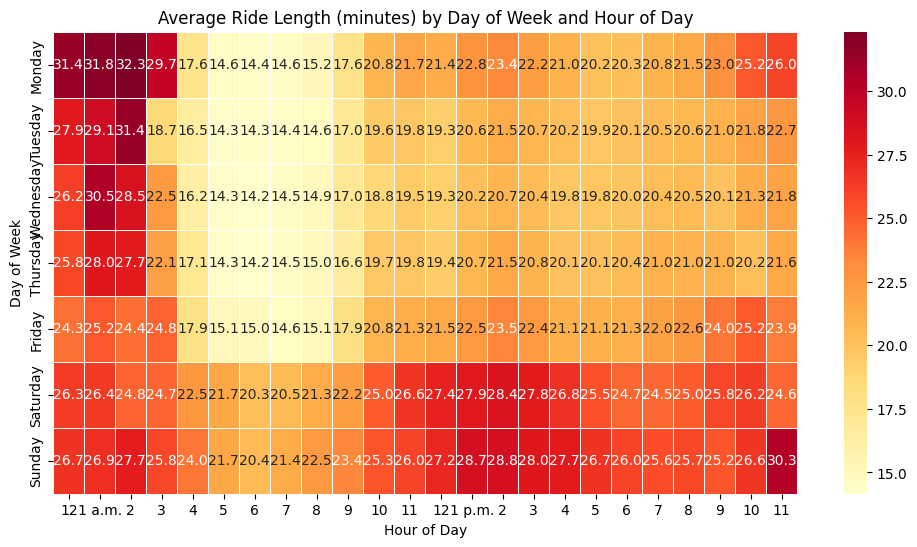

In [867]:
# create pivot table
pivot_table = pd.pivot_table(df, values='ride_length_minutes', index='day_of_week', columns='hour_of_day', aggfunc='mean')

# create heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.1f', linewidths=.5)
plt.title('Average Ride Length (minutes) by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# add a color-coded legend showing the mapping of day of week numbers to day names and hour values
plt.xticks(np.arange(0.5, 24.5, 1), [hour_values[i] for i in range(24)])
plt.yticks(np.arange(0.5, 7.5, 1), [day_names[i] for i in range(7)])
plt.show()

# Monthly Trends

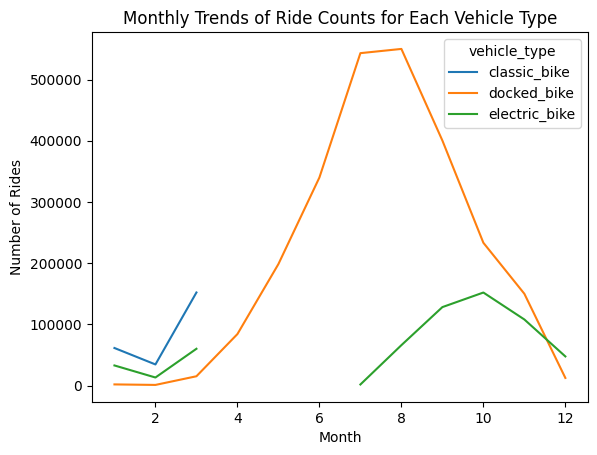

In [868]:
# Group the data by month and vehicle type and count the ride_id
df_grouped = df.groupby(['month', 'vehicle_type']).count()['ride_id'].reset_index()

# Pivot the data to make vehicle types as columns
df_pivoted = df_grouped.pivot(index='month', columns='vehicle_type', values='ride_id')

# Plot the line graph
df_pivoted.plot.line()
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Monthly Trends of Ride Counts for Each Vehicle Type')
plt.show()

# Recommendation Four: Frequent Routes

In [869]:
# create a new column that concatenates the start and end station names
df = df.drop(index=df[df['start_station_name'] == 'N/A'].index)
df = df.drop(index=df[df['end_station_name'] == 'N/A'].index)
df['route'] = df['start_station_name'] + ' -> ' + df['end_station_name']
# group the data by user_type and route, and count the number of rides for each group
route_count = df.groupby(['user_type', 'route'])['ride_id'].count()

# sort the results in descending order and select the top 10 routes for each user type
top_routes = route_count.groupby('user_type').apply(lambda x: x.sort_values(ascending=False).head(10))

# print the results
print('Top 10 Routes by User Type:')
print(top_routes)

Top 10 Routes by User Type:
user_type  user_type  route                                                             
casual     casual     Streeter Dr & Grand Ave -> Streeter Dr & Grand Ave                    6011
                      Lake Shore Dr & Monroe St -> Lake Shore Dr & Monroe St                5844
                      Millennium Park -> Millennium Park                                    4935
                      Buckingham Fountain -> Buckingham Fountain                            4671
                      Indiana Ave & Roosevelt Rd -> Indiana Ave & Roosevelt Rd              3835
                      Michigan Ave & Oak St -> Michigan Ave & Oak St                        3546
                      Fort Dearborn Dr & 31st St -> Fort Dearborn Dr & 31st St              3122
                      Michigan Ave & 8th St -> Michigan Ave & 8th St                        3100
                      Shore Dr & 55th St -> Shore Dr & 55th St                              2934
          

## Insights and Recommendations

Differences in ride frequency and ride distance: Casual riders are less frequent users of Cyclistic bikes compared to annual members, indicating a possible need for marketing efforts that encourage more frequent use among casual riders. Additionally, annual members ride slightly shorter distances than casual riders, which may indicate that annual memberships are best suited for those who use the bikes primarily for short commutes.

Differences in average ride length: Casual riders have a much longer average ride length than annual members, indicating that they use the bikes for leisurely or recreational purposes. This finding suggests that Cyclistic could market the bikes as a fun and easy way to explore the city, rather than just a mode of transportation.

Differences in ride time of day: Casual riders tend to use Cyclistic bikes more during the day, while annual members use them more in the early morning and evening. This finding suggests that Cyclistic could tailor marketing efforts towards casual riders during the day, while targeting annual members during the early morning and evening, possibly highlighting the benefits of using the bikes for commuting.

Differences in vehicle type usage: Casual riders use docked bikes the most, while annual members use a combination of docked and electric bikes. This finding suggests that Cyclistic could consider expanding its electric bike fleet to attract more annual members.

Based on these insights, the following recommendations can be made:

Target marketing efforts towards casual riders that encourage more frequent use, such as promotions for multiple rides per day or weekend deals.

Market the bikes to casual riders as a fun and easy way to explore the city, highlighting scenic routes or popular destinations.

Tailor marketing efforts towards casual riders during the day, while targeting annual members during the early morning and evening, possibly highlighting the benefits of using the bikes for commuting.

Consider expanding Cyclistic's electric bike fleet to attract more annual members.

## Limitations

I noticed a bias in my analysis when I filtered ride length to be less than or equal to one hour. This excluded data from casual users who tend to take longer leisurely rides compared to annual members. To address this bias, I expanded the filter to three hours based on the histogram, which showed a right skew. This adjustment ensures data integrity without creating bias against any user type.

To further improve data collection, I suggest asking the company for their definition of an outlier and their refund policy for users who forget to end their ride on the app. Testing their service can also provide a better understanding of how it works.

Regarding the geodesic function code, I attempted to optimize it to decrease runtime, but I was unsuccessful in finding alternatives.

Data Limitations: The analysis is limited to the historical trip data provided by Cyclistic. This dataset may not contain all the necessary variables to comprehensively answer the business questions. Also, the data does not provide information about the demographics of the riders, which could limit the analysis.

Scope Limitations: The project only focuses on one aspect of the business question - how annual members and casual riders use Cyclistic bikes differently. Other important aspects of the question, such as why casual riders would buy Cyclistic annual memberships and how digital media could affect marketing tactics, are not addressed.

Time Limitations: The project is limited to analyzing the previous 12 months of Cyclistic trip data. This limited timeframe may not be sufficient to identify long-term trends and patterns in the data.

External Factors: The analysis does not consider external factors such as weather, events, or holidays, which could significantly affect the ridership patterns.

Sample Limitations: The analysis is limited to the data provided by Cyclistic, which may not represent the entire population of Cyclistic users. The analysis does not account for the sampling bias in the data, which could affect the generalizability of the findings.

## Implementation

1. Develop and implement targeted marketing campaigns:
- Develop marketing materials for casual riders that encourage more frequent use and highlight the benefits of using Cyclistic bikes for leisurely or recreational purposes.
- Develop marketing materials for annual members that highlight the benefits of using the bikes for commuting.
- Tailor marketing efforts towards casual riders during the day and annual members during the early morning and evening.
- Timeframe: 1-2 months

2. Expand the electric bike fleet:
- Conduct a feasibility study to assess the cost and potential benefits of expanding the electric bike fleet.
- Develop a plan for purchasing and deploying additional electric bikes.
- Timeframe: 3-6 months

3. Collect and analyze data on the effectiveness of the marketing campaigns and electric bike expansion:
- Collect data on ride frequency, ride distance, and vehicle type usage before and after the marketing campaigns and electric bike expansion.
- Analyze the data to determine the effectiveness of the campaigns and the expansion in attracting more casual riders and annual members.
- Timeframe: 3-6 months

4. Make necessary adjustments to marketing campaigns and fleet expansion based on data analysis:
- Based on the data analysis, make necessary adjustments to the marketing campaigns and electric bike expansion to ensure they are effectively attracting more casual riders and annual members.
- Timeframe: Ongoing
- Overall timeframe: 6-12 months

## Summary: 

The Cyclistic bike-share analysis project is a marketing analytics task that involves analyzing the historical trip data of Cyclistic, a bike-share company in Chicago. The goal of the analysis is to understand how annual members and casual riders use Cyclistic bikes differently to design a new marketing strategy aimed at converting casual riders into annual members. The project involves data cleaning and manipulation, data analysis, data visualization, and business acumen. Key findings include differences in ride frequency and ride distance, differences in average ride length, differences in ride time of day, and differences in vehicle type usage. Based on the insights, the project recommends targeting marketing efforts towards casual riders to encourage more frequent use, marketing the bikes as a fun and easy way to explore the city, tailoring marketing efforts towards casual riders during the day, targeting annual members during the early morning and evening, and expanding Cyclistic's electric bike fleet to attract more annual members.

In [870]:
# select only the desired columns
#df = df[['ride_id', 'vehicle_type', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'user_type','start_station_name','end_station_name']]

# save the filtered dataset to a new CSV file
#df.to_csv('Bike_data_Tableau_V02.csv', index=False)